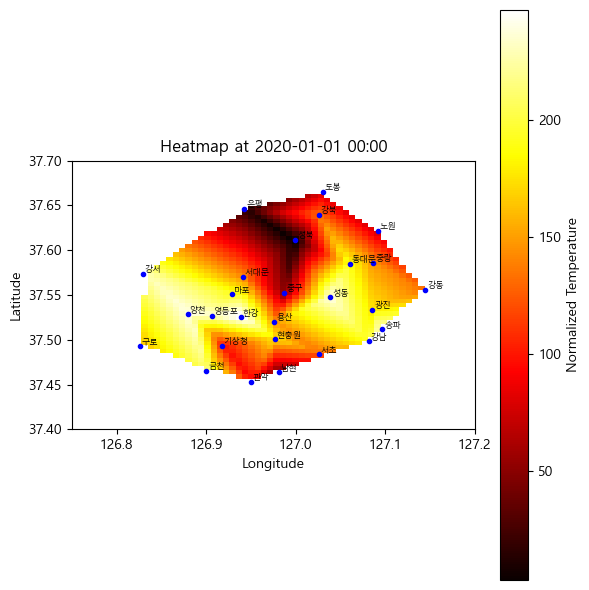

In [7]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['font.family'] = 'Malgun Gothic'

# 위경도 정보
location_coords = {
    "강남": (37.4982, 127.08162),
    "강동": (37.55556, 127.14498),
    "강북": (37.63972, 127.02576),
    "강서": (37.5739, 126.82953),
    "관악": (37.45284, 126.95015),
    "광진": (37.5338, 127.08566),
    "구로": (37.49328, 126.82629),
    "금천": (37.46551, 126.90016),
    "기상청": (37.4933, 126.91746),
    "남현": (37.46347, 126.98154),
    "노원": (37.62186, 127.09192),
    "도봉": (37.66557, 127.03042),
    "동대문": (37.58463, 127.06036),
    "마포": (37.55165, 126.92915),
    "서대문": (37.57047, 126.94078),
    "서초": (37.48462, 127.02601),
    "성동": (37.54721, 127.03885),
    "성북": (37.61134, 126.99981),
    "송파": (37.51151, 127.0967),
    "양천": (37.52823, 126.87937),
    "영등포": (37.52706, 126.90705),
    "용산": (37.51955, 126.97629),
    "은평": (37.64647, 126.94273),
    "중구": (37.55236, 126.98736),
    "중랑": (37.58551, 127.08682),
    "한강": (37.52489, 126.93904),
    "현충원": (37.50036, 126.97652)
}

# 그리드 설정
lat_range = (37.4, 37.7)
lon_range = (126.75, 127.2)
grid_res = 64
grid_y, grid_x = np.mgrid[lat_range[0]:lat_range[1]:grid_res*1j,
                          lon_range[0]:lon_range[1]:grid_res*1j]

# 데이터 경로
root_dir = "서울_AWS_기온_지점별"

# 모든 CSV 읽고 병합
dfs = []
for loc_name in os.listdir(root_dir):
    loc_path = os.path.join(root_dir, loc_name)
    if not os.path.isdir(loc_path) or loc_name not in location_coords:
        continue
    for fname in os.listdir(loc_path):
        if fname.endswith(".csv"):
            file_path = os.path.join(loc_path, fname)
            df = pd.read_csv(file_path, encoding='cp949')
            df["지점명"] = loc_name
            dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df["일시"] = pd.to_datetime(df["일시"])

# 샘플 시점 선택 (가장 첫 시점 사용)
sample_timestamp = df["일시"].sort_values().unique()[0]
group = df[df["일시"] == sample_timestamp]

# 좌표 및 기온 추출
coords = []
temps = []
for _, row in group.iterrows():
    loc = row["지점명"]
    temp = row["기온(°C)"]
    if loc in location_coords and not pd.isna(temp):
        lat, lon = location_coords[loc]
        coords.append((lat, lon))
        temps.append(temp)

# 보간
if len(coords) >= 5:
    temps = np.array(temps)
    norm_temp = (temps - temps.min()) / (temps.max() - temps.min() + 1e-5) * 255
    grid = griddata(coords, norm_temp, (grid_y, grid_x), method='linear', fill_value=np.nan)

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, origin='lower', cmap='hot',
               extent=(lon_range[0], lon_range[1], lat_range[0], lat_range[1]))
    plt.colorbar(label='Normalized Temperature')

    # 관측소 위치 표시
    for loc, (lat, lon) in location_coords.items():
        plt.plot(lon, lat, 'bo', markersize=3)
        plt.text(lon + 0.002, lat + 0.002, loc, fontsize=6)

    plt.title(f"Heatmap at {sample_timestamp.strftime('%Y-%m-%d %H:%M')}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()
else:
    print("유효한 관측소 수가 부족하여 보간을 생략합니다.")


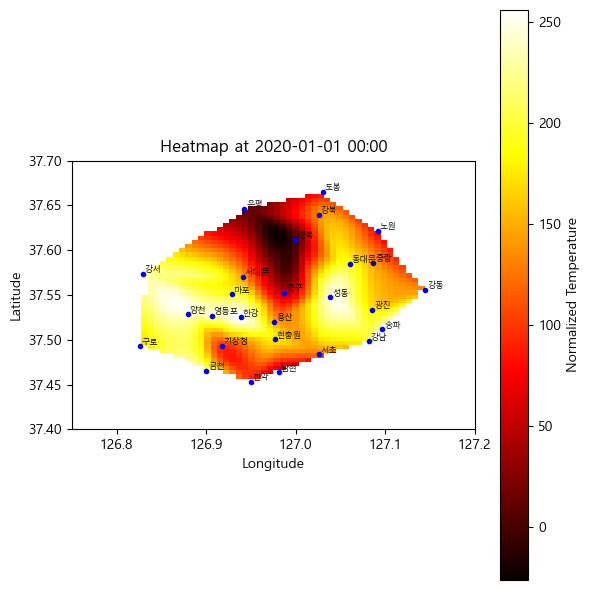

In [5]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['font.family'] = 'Malgun Gothic'

# 위경도 정보
location_coords = {
    "강남": (37.4982, 127.08162),
    "강동": (37.55556, 127.14498),
    "강북": (37.63972, 127.02576),
    "강서": (37.5739, 126.82953),
    "관악": (37.45284, 126.95015),
    "광진": (37.5338, 127.08566),
    "구로": (37.49328, 126.82629),
    "금천": (37.46551, 126.90016),
    "기상청": (37.4933, 126.91746),
    "남현": (37.46347, 126.98154),
    "노원": (37.62186, 127.09192),
    "도봉": (37.66557, 127.03042),
    "동대문": (37.58463, 127.06036),
    "마포": (37.55165, 126.92915),
    "서대문": (37.57047, 126.94078),
    "서초": (37.48462, 127.02601),
    "성동": (37.54721, 127.03885),
    "성북": (37.61134, 126.99981),
    "송파": (37.51151, 127.0967),
    "양천": (37.52823, 126.87937),
    "영등포": (37.52706, 126.90705),
    "용산": (37.51955, 126.97629),
    "은평": (37.64647, 126.94273),
    "중구": (37.55236, 126.98736),
    "중랑": (37.58551, 127.08682),
    "한강": (37.52489, 126.93904),
    "현충원": (37.50036, 126.97652)
}

# 그리드 설정
lat_range = (37.4, 37.7)
lon_range = (126.75, 127.2)
grid_res = 64
grid_y, grid_x = np.mgrid[lat_range[0]:lat_range[1]:grid_res*1j,
                          lon_range[0]:lon_range[1]:grid_res*1j]

# 데이터 경로
root_dir = "서울_AWS_기온_지점별"

# 모든 CSV 읽고 병합
dfs = []
for loc_name in os.listdir(root_dir):
    loc_path = os.path.join(root_dir, loc_name)
    if not os.path.isdir(loc_path) or loc_name not in location_coords:
        continue
    for fname in os.listdir(loc_path):
        if fname.endswith(".csv"):
            file_path = os.path.join(loc_path, fname)
            df = pd.read_csv(file_path, encoding='cp949')
            df["지점명"] = loc_name
            dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df["일시"] = pd.to_datetime(df["일시"])

# 샘플 시점 선택 (가장 첫 시점 사용)
sample_timestamp = df["일시"].sort_values().unique()[0]
group = df[df["일시"] == sample_timestamp]

# 좌표 및 기온 추출
coords = []
temps = []
for _, row in group.iterrows():
    loc = row["지점명"]
    temp = row["기온(°C)"]
    if loc in location_coords and not pd.isna(temp):
        lat, lon = location_coords[loc]
        coords.append((lat, lon))
        temps.append(temp)

# 보간
if len(coords) >= 5:
    temps = np.array(temps)
    norm_temp = (temps - temps.min()) / (temps.max() - temps.min() + 1e-5) * 255
    grid = griddata(coords, norm_temp, (grid_y, grid_x), method='cubic',fill_value=np.nan)

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, origin='lower', cmap='hot',
               extent=(lon_range[0], lon_range[1], lat_range[0], lat_range[1]))
    plt.colorbar(label='Normalized Temperature')

    # 관측소 위치 표시
    for loc, (lat, lon) in location_coords.items():
        plt.plot(lon, lat, 'bo', markersize=3)
        plt.text(lon + 0.002, lat + 0.002, loc, fontsize=6)

    plt.title(f"Heatmap at {sample_timestamp.strftime('%Y-%m-%d %H:%M')}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()
else:
    print("유효한 관측소 수가 부족하여 보간을 생략합니다.")


In [11]:
import geopandas as gpd

# 1. 서울시 행정구역 불러오기 (예: GeoJSON or SHP)
boundary = gpd.read_file("LARD_ADM_SECT_SGG_11_202504.shp")
boundary


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,Á¾·Î±¸,11,11110,"POLYGON ((197747.19 559404.357, 197816.146 559..."
1,11140,Áß±¸,34,11140,"POLYGON ((199180.56 552312.173, 199200.919 552..."
2,11170,¿ë»ê±¸,1,11170,"POLYGON ((195172.988 548501.443, 195174.944 54..."
3,11200,¼ºµ¿±¸,1,11200,"POLYGON ((202436.423 551969.867, 202411.18 551..."
4,11215,±¤Áø±¸,49,11215,"POLYGON ((206870.485 547252.494, 206638.546 54..."
5,11230,µ¿´ë¹®±¸,232,11230,"POLYGON ((202114.535 553412.551, 202115.139 55..."
6,11260,Áß¶û±¸,34,11260,"POLYGON ((207991.744 558021.627, 207994.004 55..."
7,11305,°­ºÏ±¸,3,11305,"POLYGON ((200470.095 565292.239, 200558.16 565..."
8,11320,¼­¿ï½ÃµµºÀ±¸,1,11320,"POLYGON ((204579.766 562597.116, 204579.756 56..."
9,11350,¼­¿ï½Ã³ë¿ø±¸,1,11350,"POLYGON ((204142.86 560111.465, 204147.926 560..."


In [15]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.ndimage import gaussian_filter
from shapely.geometry import Point
import geopandas as gpd

rcParams['font.family'] = 'Malgun Gothic'

# ============================================
# 1. 서울시 경계 SHP 불러오기
# ============================================
gdf = gpd.read_file("LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11_202504.shp")  # 정확한 파일명으로 바꿔야 함
gdf = gdf.to_crs(epsg=4326)  # 위경도 맞춤

# ============================================
# 2. 온도 CSV 데이터 로딩
# ============================================
location_coords = {
    "강남": (37.4982, 127.08162),
    "강동": (37.55556, 127.14498),
    "강북": (37.63972, 127.02576),
    "강서": (37.5739, 126.82953),
    "관악": (37.45284, 126.95015),
    "광진": (37.5338, 127.08566),
    "구로": (37.49328, 126.82629),
    "금천": (37.46551, 126.90016),
    "기상청": (37.4933, 126.91746),
    "남현": (37.46347, 126.98154),
    "노원": (37.62186, 127.09192),
    "도봉": (37.66557, 127.03042),
    "동대문": (37.58463, 127.06036),
    "마포": (37.55165, 126.92915),
    "서대문": (37.57047, 126.94078),
    "서초": (37.48462, 127.02601),
    "성동": (37.54721, 127.03885),
    "성북": (37.61134, 126.99981),
    "송파": (37.51151, 127.0967),
    "양천": (37.52823, 126.87937),
    "영등포": (37.52706, 126.90705),
    "용산": (37.51955, 126.97629),
    "은평": (37.64647, 126.94273),
    "중구": (37.55236, 126.98736),
    "중랑": (37.58551, 127.08682),
    "한강": (37.52489, 126.93904),
    "현충원": (37.50036, 126.97652)
}

root_dir = "서울_AWS_기온_지점별"
dfs = []
for loc_name in os.listdir(root_dir):
    loc_path = os.path.join(root_dir, loc_name)
    if not os.path.isdir(loc_path) or loc_name not in location_coords:
        continue
    for fname in os.listdir(loc_path):
        if fname.endswith(".csv"):
            file_path = os.path.join(loc_path, fname)
            df = pd.read_csv(file_path, encoding='cp949')
            df["지점명"] = loc_name
            dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df["일시"] = pd.to_datetime(df["일시"])
sample_timestamp = df["일시"].sort_values().unique()[0]
group = df[df["일시"] == sample_timestamp]

# ============================================
# 3. 격자 설정 + 값 채우기
# ============================================
xmin, ymin, xmax, ymax = gdf.total_bounds
res = 500
xgrid = np.linspace(xmin, xmax, res)
ygrid = np.linspace(ymin, ymax, res)
xx, yy = np.meshgrid(xgrid, ygrid)
zz = np.zeros_like(xx)

# 온도 채우기
for _, row in group.iterrows():
    loc = row["지점명"]
    temp = row["기온(°C)"]
    if loc in location_coords and not pd.isna(temp):
        lat, lon = location_coords[loc]
        dist = (xx - lon)**2 + (yy - lat)**2
        zz += np.exp(-dist / 0.0005) * temp  # 거리 가중치로 퍼뜨리기

# ============================================
# 4. Gaussian Blur + 마스킹
# ============================================
zz = gaussian_filter(zz, sigma=6)

# 마스크 만들기
mask = np.zeros_like(zz, dtype=bool)
from shapely.geometry import Point
for i in range(res):
    for j in range(res):
        pt = Point(xx[i, j], yy[i, j])
        if gdf.geometry.unary_union.contains(pt):
            mask[i, j] = True

zz[~mask] = np.nan

# ============================================
# 5. 시각화
# ============================================
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.imshow(zz, origin="lower", extent=(xmin, xmax, ymin, ymax),
              cmap="cool", alpha=0.9)
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# 구 이름 표시
gdf["center"] = gdf.geometry.centroid
for _, row in gdf.iterrows():
    ax.text(row["center"].x, row["center"].y, row["ADM_DR_NM"],
            fontsize=6, ha='center')

plt.title(f"서울시 온도 분포 ({sample_timestamp.strftime('%Y-%m-%d %H:%M')})")
fig.colorbar(c, ax=ax, label='온도(°C)')
plt.axis("off")
plt.tight_layout()
plt.show()


C:\Users\linaa\AppData\Local\Temp\ipykernel_17716\3570505760.py:100: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if gdf.geometry.unary_union.contains(pt):
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000029D2D7AEED0>>
Traceback (most recent call last):
  File "C:\Users\linaa\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



C:\Users\linaa\AppData\Local\Temp\ipykernel_24696\4228063946.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["center"] = gdf.geometry.centroid


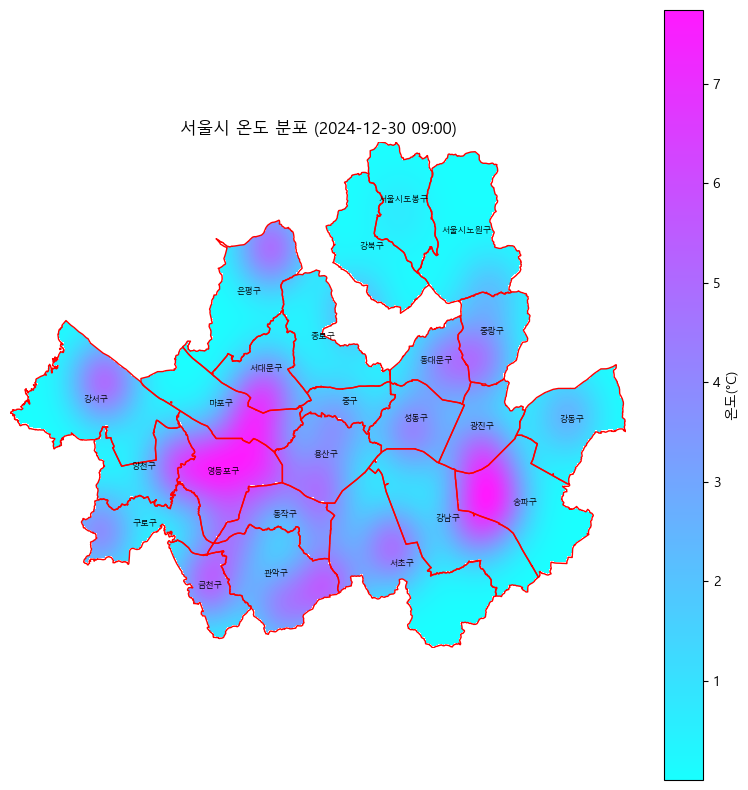

In [24]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.ndimage import gaussian_filter
from shapely.geometry import Point
from rasterio.features import geometry_mask

rcParams["font.family"] = "Malgun Gothic"

# ================================
# 1. 서울시 경계 SHP 불러오기
# ================================
gdf = gpd.read_file("LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11_202504.shp",encoding='cp949')
gdf = gdf.to_crs(epsg=4326)

# ================================
# 2. 관측소 위치 정의
# ================================
location_coords = {
    "강남": (37.4982, 127.08162),
    "강동": (37.55556, 127.14498),
    "강북": (37.63972, 127.02576),
    "강서": (37.5739, 126.82953),
    "관악": (37.45284, 126.95015),
    "광진": (37.5338, 127.08566),
    "구로": (37.49328, 126.82629),
    "금천": (37.46551, 126.90016),
    "기상청": (37.4933, 126.91746),
    "남현": (37.46347, 126.98154),
    "노원": (37.62186, 127.09192),
    "도봉": (37.66557, 127.03042),
    "동대문": (37.58463, 127.06036),
    "마포": (37.55165, 126.92915),
    "서대문": (37.57047, 126.94078),
    "서초": (37.48462, 127.02601),
    "성동": (37.54721, 127.03885),
    "성북": (37.61134, 126.99981),
    "송파": (37.51151, 127.0967),
    "양천": (37.52823, 126.87937),
    "영등포": (37.52706, 126.90705),
    "용산": (37.51955, 126.97629),
    "은평": (37.64647, 126.94273),
    "중구": (37.55236, 126.98736),
    "중랑": (37.58551, 127.08682),
    "한강": (37.52489, 126.93904),
    "현충원": (37.50036, 126.97652),
}

# ================================
# 3. AWS 데이터 로딩
# ================================
df=pd.read_csv("온도 샘플.csv",encoding="cp949")
df["일시"] = pd.to_datetime(df["일시"])

# ================================
# 4. 특정 시각 필터링
# ================================
target_time = pd.to_datetime("2024-12-30 09:00")  # 원하는 시각 설정
group = df[df["일시"] == target_time]

# ================================
# 5. 격자 및 온도 계산
# ================================
xmin, ymin, xmax, ymax = gdf.total_bounds
res = 500
xgrid = np.linspace(xmin, xmax, res)
ygrid = np.linspace(ymin, ymax, res)
xx, yy = np.meshgrid(xgrid, ygrid)
zz = np.zeros_like(xx)

for _, row in group.iterrows():
    loc = row["지점명"]
    temp = row["기온(°C)"]
    if loc in location_coords and not pd.isna(temp):
        lat, lon = location_coords[loc]
        dist = (xx - lon) ** 2 + (yy - lat) ** 2
        zz += np.exp(-dist / 0.0005) * temp

zz = gaussian_filter(zz, sigma=6)

# ================================
# 6. 서울시 경계 마스크 처리
# ================================
from affine import Affine
transform = Affine((xmax - xmin)/res, 0, xmin, 0, (ymax - ymin)/res, ymin)

mask = geometry_mask(gdf.geometry, out_shape=zz.shape, transform=transform, invert=True)
zz[~mask] = np.nan

# ================================
# 7. 시각화
# ================================
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.imshow(zz, origin="lower", extent=(xmin, xmax, ymin, ymax),
              cmap="cool", alpha=0.9)
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# 구 이름 표시
gdf["center"] = gdf.geometry.centroid
for _, row in gdf.iterrows():
    ax.text(row["center"].x, row["center"].y, row["SGG_NM"], fontsize=6, ha='center')

plt.title(f"서울시 온도 분포 ({target_time.strftime('%Y-%m-%d %H:%M')})")
fig.colorbar(c, ax=ax, label='온도(°C)')
plt.axis("off")
plt.tight_layout()
plt.show()


In [3]:
import numpy
import scipy
print(numpy.__version__)
print(scipy.__version__)


2.2.5
1.11.3


In [9]:

# ================================
# 1. 서울시 경계 SHP 불러오기
# ================================
gdf = gpd.read_file("LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11_202504.shp",encoding='cp949')
gdf = gdf.to_crs(epsg=4326)
gdf


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry
0,11110,종로구,11,11110,"POLYGON ((126.97448 37.63425, 126.97526 37.634..."
1,11140,중구,34,11140,"POLYGON ((126.99072 37.57035, 126.99095 37.570..."
2,11170,용산구,1,11170,"POLYGON ((126.94539 37.536, 126.94541 37.53603..."
3,11200,성동구,1,11200,"POLYGON ((127.02758 37.56726, 127.02729 37.567..."
4,11215,광진구,49,11215,"POLYGON ((127.07772 37.52474, 127.0751 37.5250..."
5,11230,동대문구,232,11230,"POLYGON ((127.02394 37.58026, 127.02395 37.580..."
6,11260,중랑구,34,11260,"POLYGON ((127.09053 37.62176, 127.09055 37.621..."
7,11305,강북구,3,11305,"POLYGON ((127.00533 37.6873, 127.00633 37.6870..."
8,11320,서울시도봉구,1,11320,"POLYGON ((127.05191 37.66301, 127.05191 37.662..."
9,11350,서울시노원구,1,11350,"POLYGON ((127.04694 37.64061, 127.047 37.64086..."


C:\Users\linaa\AppData\Local\Temp\ipykernel_24696\1886301403.py:84: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["center"] = gdf.geometry.centroid


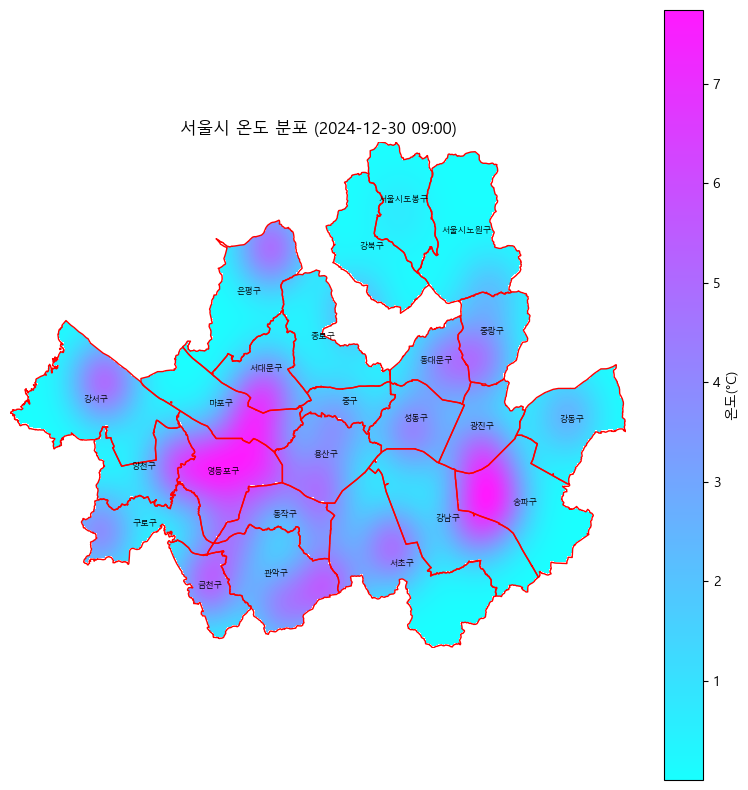

In [22]:
# ================================
# 2. 관측소 위치 정의
# ================================
location_coords = {
    "강남": (37.4982, 127.08162),
    "강동": (37.55556, 127.14498),
    "강북": (37.63972, 127.02576),
    "강서": (37.5739, 126.82953),
    "관악": (37.45284, 126.95015),
    "광진": (37.5338, 127.08566),
    "구로": (37.49328, 126.82629),
    "금천": (37.46551, 126.90016),
    "기상청": (37.4933, 126.91746),
    "남현": (37.46347, 126.98154),
    "노원": (37.62186, 127.09192),
    "도봉": (37.66557, 127.03042),
    "동대문": (37.58463, 127.06036),
    "마포": (37.55165, 126.92915),
    "서대문": (37.57047, 126.94078),
    "서초": (37.48462, 127.02601),
    "성동": (37.54721, 127.03885),
    "성북": (37.61134, 126.99981),
    "송파": (37.51151, 127.0967),
    "양천": (37.52823, 126.87937),
    "영등포": (37.52706, 126.90705),
    "용산": (37.51955, 126.97629),
    "은평": (37.64647, 126.94273),
    "중구": (37.55236, 126.98736),
    "중랑": (37.58551, 127.08682),
    "한강": (37.52489, 126.93904),
    "현충원": (37.50036, 126.97652),
}

# ================================
# 3. AWS 데이터 로딩
# ================================
df=pd.read_csv("온도 샘플.csv",encoding="cp949")
df["일시"] = pd.to_datetime(df["일시"])

# ================================
# 4. 특정 시각 필터링
# ================================
target_time = pd.to_datetime("2024-12-30 09:00")  # 원하는 시각 설정
group = df[df["일시"] == target_time]

# ================================
# 5. 격자 및 온도 계산
# ================================
xmin, ymin, xmax, ymax = gdf.total_bounds
res = 500
xgrid = np.linspace(xmin, xmax, res)
ygrid = np.linspace(ymin, ymax, res)
xx, yy = np.meshgrid(xgrid, ygrid)
zz = np.zeros_like(xx)

for _, row in group.iterrows():
    loc = row["지점명"]
    temp = row["기온(°C)"]
    if loc in location_coords and not pd.isna(temp):
        lat, lon = location_coords[loc]
        dist = (xx - lon) ** 2 + (yy - lat) ** 2
        zz += np.exp(-dist / 0.0005) * temp

zz = gaussian_filter(zz, sigma=6)

# ================================
# 6. 서울시 경계 마스크 처리
# ================================
from affine import Affine
transform = Affine((xmax - xmin)/res, 0, xmin, 0, (ymax - ymin)/res, ymin)

mask = geometry_mask(gdf.geometry, out_shape=zz.shape, transform=transform, invert=True)
zz[~mask] = np.nan

# ================================
# 7. 시각화
# ================================
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.imshow(zz, origin="lower", extent=(xmin, xmax, ymin, ymax),
              cmap="cool", alpha=0.9)
gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=1)

# 구 이름 표시
gdf["center"] = gdf.geometry.centroid
for _, row in gdf.iterrows():
    ax.text(row["center"].x, row["center"].y, row["SGG_NM"], fontsize=6, ha='center')

plt.title(f"서울시 온도 분포 ({target_time.strftime('%Y-%m-%d %H:%M')})")
fig.colorbar(c, ax=ax, label='온도(°C)')
plt.axis("off")
plt.tight_layout()
plt.show()


In [18]:
# ================================
# 2. 관측소 위치 정의
# ================================
location_coords = {
    "강남": (37.4982, 127.08162),
    "강동": (37.55556, 127.14498),
    "강북": (37.63972, 127.02576),
    "강서": (37.5739, 126.82953),
    "관악": (37.45284, 126.95015),
    "광진": (37.5338, 127.08566),
    "구로": (37.49328, 126.82629),
    "금천": (37.46551, 126.90016),
    "기상청": (37.4933, 126.91746),
    "남현": (37.46347, 126.98154),
    "노원": (37.62186, 127.09192),
    "도봉": (37.66557, 127.03042),
    "동대문": (37.58463, 127.06036),
    "마포": (37.55165, 126.92915),
    "서대문": (37.57047, 126.94078),
    "서초": (37.48462, 127.02601),
    "성동": (37.54721, 127.03885),
    "성북": (37.61134, 126.99981),
    "송파": (37.51151, 127.0967),
    "양천": (37.52823, 126.87937),
    "영등포": (37.52706, 126.90705),
    "용산": (37.51955, 126.97629),
    "은평": (37.64647, 126.94273),
    "중구": (37.55236, 126.98736),
    "중랑": (37.58551, 127.08682),
    "한강": (37.52489, 126.93904),
    "현충원": (37.50036, 126.97652),
}

# ================================
# 3. AWS 데이터 로딩
# ================================
df=pd.read_csv("온도 샘플.csv",encoding="cp949")
df["일시"] = pd.to_datetime(df["일시"])



In [19]:
df

,지점,지점명,일시,기온(°C),강수량(mm),습도(%)
0,400,강남,2024-12-30 00:00:00,2.8,0,64
1,400,강남,2024-12-30 01:00:00,3.2,0,62
2,400,강남,2024-12-30 02:00:00,3.2,0,63
3,400,강남,2024-12-30 03:00:00,3.5,0,63
4,400,강남,2024-12-30 04:00:00,3.7,0,64
...,...,...,...,...,...,...
670,889,현충원,2024-12-30 20:00:00,3.4,0,88
671,889,현충원,2024-12-30 21:00:00,2.5,0,88
672,889,현충원,2024-12-30 22:00:00,2.6,0,83
673,889,현충원,2024-12-30 23:00:00,2.2,0,89


In [23]:
# ================================
# 4. 특정 시각 필터링
# ================================
target_time = pd.to_datetime("2024-12-30 09:00")  # 원하는 시각 설정
group = df[df["일시"] == target_time]
group

,지점,지점명,일시,기온(°C),강수량(mm),습도(%)
9,400,강남,2024-12-30 09:00:00,4.0,0,73
34,401,서초,2024-12-30 09:00:00,4.9,0,69
59,402,강동,2024-12-30 09:00:00,2.6,0,74
84,403,송파,2024-12-30 09:00:00,4.4,0,71
109,404,강서,2024-12-30 09:00:00,5.2,0,69
134,405,양천,2024-12-30 09:00:00,5.0,0,69
159,406,도봉,2024-12-30 09:00:00,0.7,0,84
184,407,노원,2024-12-30 09:00:00,2.1,0,74
209,408,동대문,2024-12-30 09:00:00,3.4,0,69
234,409,중랑,2024-12-30 09:00:00,3.7,0,69
